## Lode Dataset

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns

train = pd.read_csv("/Users/ming/Desktop/dsschool/bike/train.csv", parse_dates=["datetime"])

# train["datetime"].dt.year (month/day/hour/minute/second/)
# 저렇게 문자로 인식되는 날짜 컬럼이 있는 경우, 각 값을 하나의 컬럼에 각각 만드는 것

train["datetime"].dt.year
train["datetime"].dt.month
train["datetime"].dt.hour
train["datetime"].dt.minute
train["datetime"].dt.second

print(train.shape)
train.head()

# 타이타닉보다 데이터의 양이 많아서 데이터 분석하는 법을 연습하기에 좋다. 또한 많은 전처리가 필요하지 않기 때문에 편리하다. 
# season : 0이 봄, 1이 여름, 2가 가을 등
# holiday : 주말을 제외한 공휴일, 추석 등 1
# workingday : 1이 근무, 0은 근무 안하는날
# weather: 1이 날씨 좋은 거고 숫자가 높아질수록 날씨가 나빠진다. 
# 오늘의 label은 count (casual= 회원, registered=비회원) count : 이 세개의 컬럼은 test에는 없지만 이걸 이용해서 예측값을 높이는 방법있다.

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [22]:
test = pd.read_csv("/Users/ming/Desktop/dsschool/bike/test.csv", parse_dates=["datetime"])
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### season encoding

In [23]:
train["season_spring"] = train["season"] == 1
train["season_summer"] = train["season"] == 2
train["season_fall"] = train["season"] == 3
train["season_winter"] = train["season"] == 4

print(train.shape)
train[["season", "season_spring", "season_summer", "season_fall", "season_winter"]].head(10)

(10886, 16)


,season,season_spring,season_summer,season_fall,season_winter
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False
5,1,True,False,False,False
6,1,True,False,False,False
7,1,True,False,False,False
8,1,True,False,False,False
9,1,True,False,False,False


### parse datetime

In [24]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

# dayofweek는 날짜에서 요일(월~일)을 가져오는 기능
# 값은 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일)
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-year", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 23)


,datetime,datetime-year,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,4,0,0,5


In [25]:
#요일을 알아보기 쉽게 바꾸기
train.loc[train["datetime-dayofweek"]==0, "datetime-dayofweek(humanized)"] = "Monday"
train.loc[train["datetime-dayofweek"]==1, "datetime-dayofweek(humanized)"] = "Tuesday"
train.loc[train["datetime-dayofweek"]==2, "datetime-dayofweek(humanized)"] = "Wednesday"
train.loc[train["datetime-dayofweek"]==3, "datetime-dayofweek(humanized)"] = "Thursday"
train.loc[train["datetime-dayofweek"]==4, "datetime-dayofweek(humanized)"] = "Friday"
train.loc[train["datetime-dayofweek"]==5, "datetime-dayofweek(humanized)"] = "Saturday"
train.loc[train["datetime-dayofweek"]==6, "datetime-dayofweek(humanized)"] = "Sunday"

print(train.shape)

train[["datetime-day", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

(10886, 24)


,datetime-day,datetime-dayofweek,datetime-dayofweek(humanized)
0,1,5,Saturday
1,1,5,Saturday
2,1,5,Saturday
3,1,5,Saturday
4,1,5,Saturday


In [26]:
#test data에 대해서도 동일하게 진행
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)

test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


In [27]:
test.loc[train["datetime-dayofweek"]==0, "datetime-dayofweek(humanized)"] = "Monday"
test.loc[train["datetime-dayofweek"]==1, "datetime-dayofweek(humanized)"] = "Tuesday"
test.loc[train["datetime-dayofweek"]==2, "datetime-dayofweek(humanized)"] = "Wednesday"
test.loc[train["datetime-dayofweek"]==3, "datetime-dayofweek(humanized)"] = "Thursday"
test.loc[train["datetime-dayofweek"]==4, "datetime-dayofweek(humanized)"] = "Friday"
test.loc[train["datetime-dayofweek"]==5, "datetime-dayofweek(humanized)"] = "Saturday"
test.loc[train["datetime-dayofweek"]==6, "datetime-dayofweek(humanized)"] = "Sunday"

print(test.shape)

test[["datetime-day", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

(6493, 17)


,datetime-day,datetime-dayofweek,datetime-dayofweek(humanized)
0,20,3,Saturday
1,20,3,Saturday
2,20,3,Saturday
3,20,3,Saturday
4,20,3,Saturday


## Explore_시각화

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

### datetime

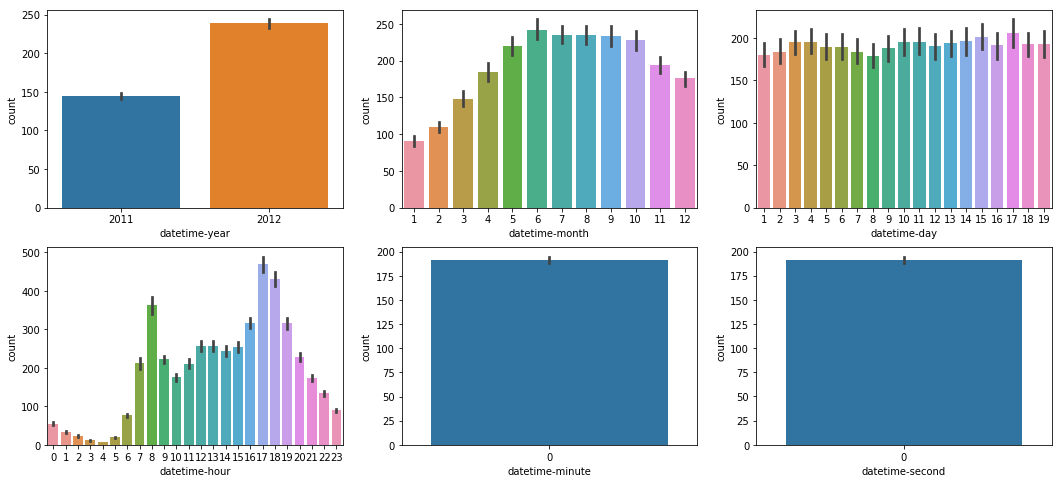

In [29]:
#한번에 여러개를 띄울 수 있는 함수(3*2로 나타내겠다)
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
#전체 크기를 18*8로 설정 (그냥 하면 크기가 너무 작아)
figure.set_size_inches(18,8)

#연,월,일,시간 등등에 따른 대여량 보기
sns.barplot(data=train, x="datetime-year", y= "count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y= "count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y= "count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y= "count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y= "count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y= "count", ax=ax6)

### datetime-year & datetime-month

In [30]:
#년+월을 합쳐서 데이터를 보겠다
# 이전까지는 정수형(int)였지만, pandas의 astype을 통해 문자열(str)로 변환
# 이 결과를 datetime-year(str)와 datetime-month(str)라는 새로운 컬럼에 집어넣는다.

train["datetime-year(str)"] = train["datetime-year"].astype('str')
train["datetime-month(str)"] = train["datetime-month"].astype('str')

train["datetime-year_month"] = train["datetime-year(str)"] + "-" + train["datetime-month(str)"]

print(train.shape)

train[["datetime", "datetime-year_month"]].head()

(10886, 27)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [31]:
#test에 대해서도 동일하게 적용
test["datetime-year(str)"] = test["datetime-year"].astype('str')
test["datetime-month(str)"] = test["datetime-month"].astype('str')

test["datetime-year_month"] = test["datetime-year(str)"] + "-" + test["datetime-month(str)"]

print(test.shape)

test[["datetime", "datetime-year_month"]].head()

(6493, 20)


,datetime,datetime-year_month
0,2011-01-20 00:00:00,2011-1
1,2011-01-20 01:00:00,2011-1
2,2011-01-20 02:00:00,2011-1
3,2011-01-20 03:00:00,2011-1
4,2011-01-20 04:00:00,2011-1


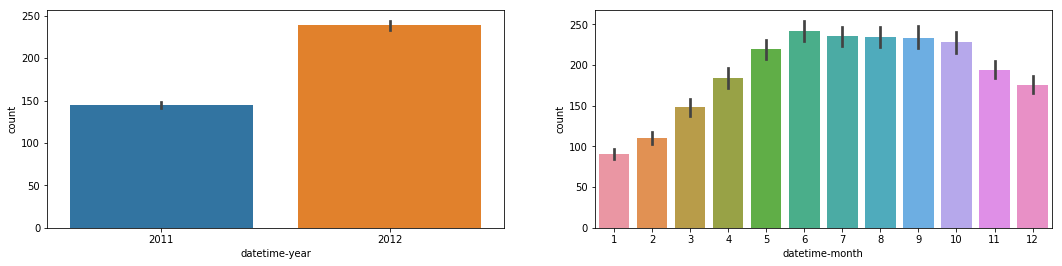

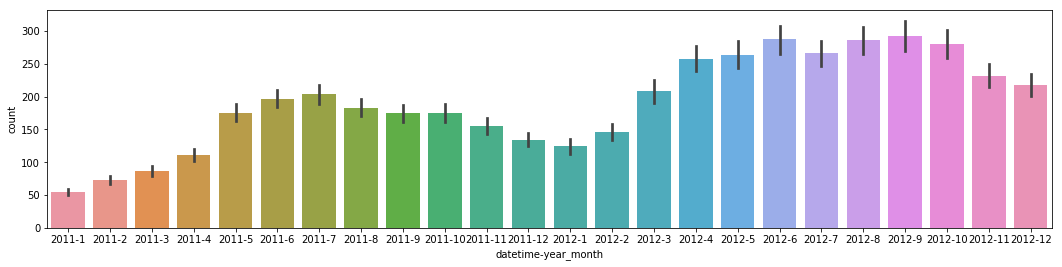

In [32]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)

# 이 시각화의 전체 사이즈는 18x4로 설정합니다.
figure.set_size_inches(18, 4)

# 이번에는 seaborn의 barplot으로 연-월을 붙여서 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

### datetime-hour

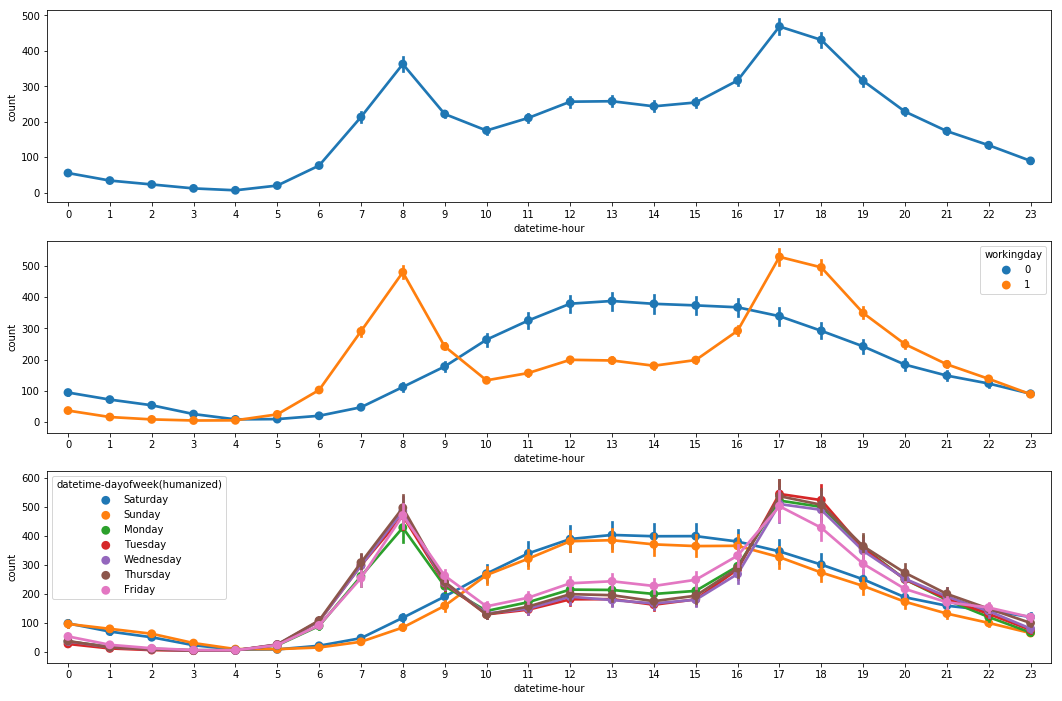

In [33]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18,12)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek(humanized)", ax=ax3)

### casual & registered

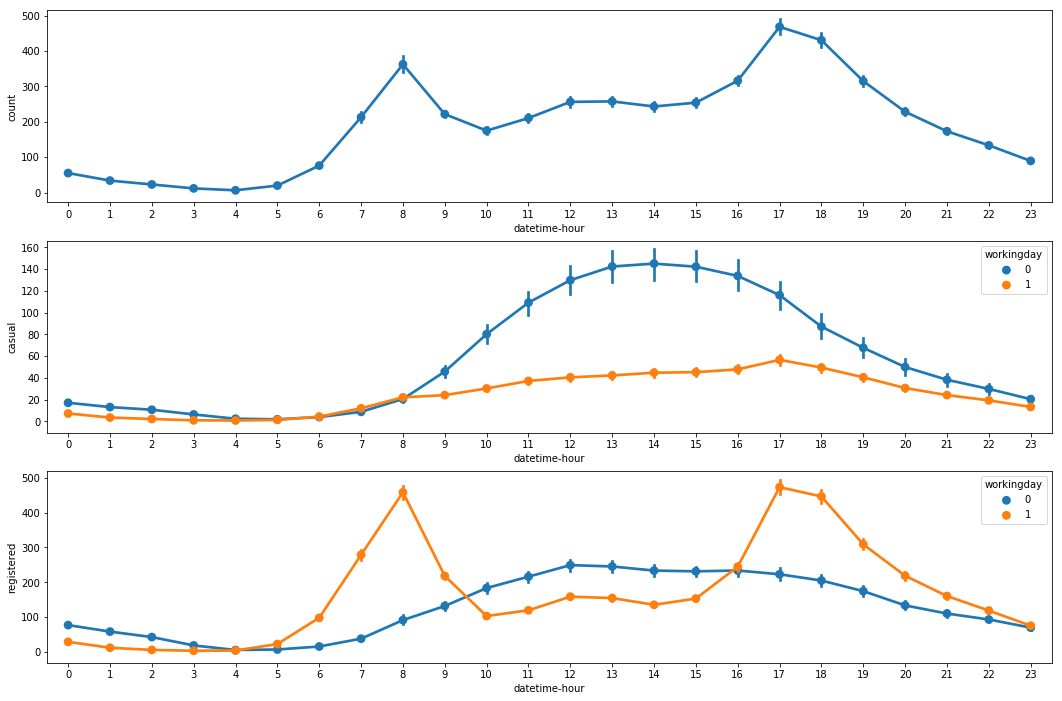

In [34]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18,12)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="casual", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="datetime-hour", y="registered", hue="workingday", ax=ax3)

### 연관성

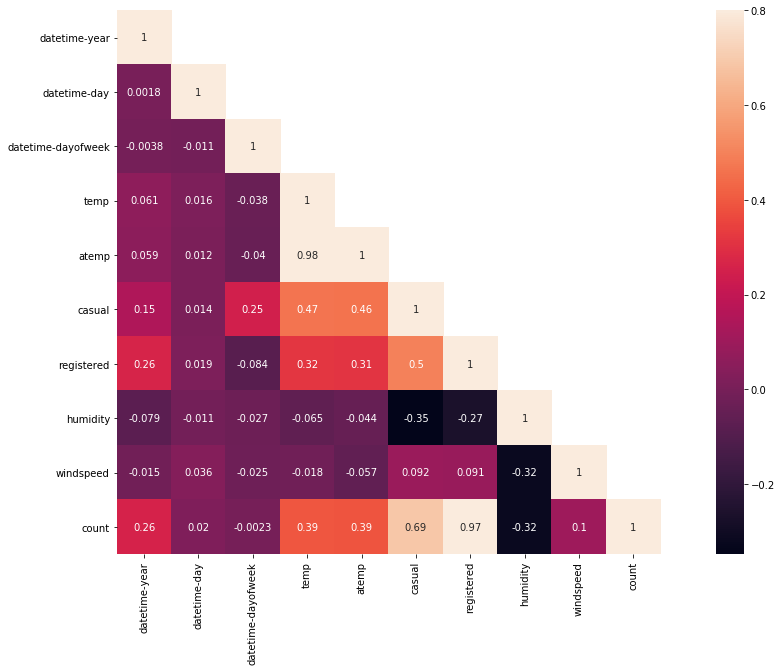

In [35]:
#서로 간의 연관성 보는 그래프
corrMatt = train[["datetime-year", "datetime-day", "datetime-dayofweek", 
                  "temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

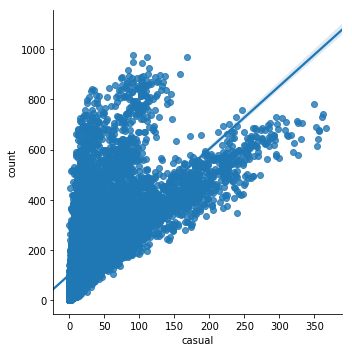

In [36]:
sns.lmplot(data=train, x="casual", y="count")

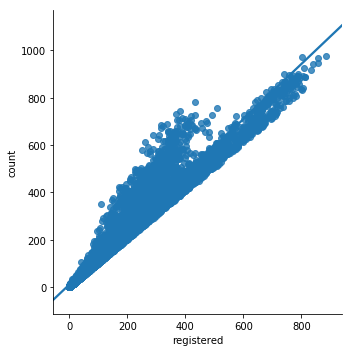

In [37]:
sns.lmplot(data=train, x="registered", y="count")

In [46]:
# 복사할 때 순서 바뀌면 안됨
train["weather_copy"] = train["weather"]
train[["weather", "weather_copy"]].head()

,weather,weather_copy
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


## 전처리

### 1. weather에 있는 4 값(하나밖에 없음)을 3으로 바꿔주는 것

In [57]:
train.loc[train["weather"]==4, "weather_copy"] = 3
train[train["weather"]==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month,weather_copy
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,...,9,18,0,0,0,Monday,2012,1,2012-1,3


In [61]:
# test도 동일하게 해준다.
test["weather_copy"] = test["weather"]
test[["weather", "weather_copy"]].head()

test.loc[test["weather"]==4, "weather_copy"] = 3
test[test["weather"]==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month,weather_copy
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028,2011,...,26,16,0,0,2,Friday,2011,1,2011-1,3
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,12.9980,2012,...,21,1,0,0,5,Friday,2012,1,2012-1,3


### 2. 풍속 빈칸 평균값으로 채우기

In [223]:
#평균값 구하기
#안하는게 나은거 같음

#위아래 평균을 채워넣는 것이 더 좋음
#0인거 아닌걸로 예측해서 넣는 것이 더 좋다
train["prev-windspeed"] = train["windspeed"].shift(+1)
train["next-windspeed"] = train["windspeed"].shift(-1)

train[["prev-windspeed", "next-windspeed", "windspeed"]].head()

,prev-windspeed,next-windspeed,windspeed
0,NaN,0.0000,0.0
1,0.0,0.0000,0.0
2,0.0,0.0000,0.0
3,0.0,0.0000,0.0
4,0.0,6.0032,0.0


In [89]:
train["windspeed_fillin"] = train["windspeed"]
train.loc[train["windspeed"]==0, "windspeed_fillin"] = 12.799
train[train["windspeed"]==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month,weather_copy,windspeed_fillin
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,0,5,Saturday,2011,1,2011-1,1,12.799
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,0,0,5,Saturday,2011,1,2011-1,1,12.799
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,2,0,0,5,Saturday,2011,1,2011-1,1,12.799
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,3,0,0,5,Saturday,2011,1,2011-1,1,12.799
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,4,0,0,5,Saturday,2011,1,2011-1,1,12.799
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0,2,...,6,0,0,5,Saturday,2011,1,2011-1,1,12.799
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0,1,...,7,0,0,5,Saturday,2011,1,2011-1,1,12.799
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0,1,...,8,0,0,5,Saturday,2011,1,2011-1,1,12.799
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0,8,...,9,0,0,5,Saturday,2011,1,2011-1,1,12.799
64,2011-01-03 19:00:00,1,0,1,1,8.20,12.880,47,0.0,8,...,19,0,0,0,Monday,2011,1,2011-1,1,12.799


In [90]:
test["windspeed_fillin"] = test["windspeed"]
test.loc[test["windspeed"]==0, "windspeed_fillin"] = 12.799
test[test["windspeed"]==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month,weather_copy,windspeed_fillin
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0,2011,...,1,0,0,3,Saturday,2011,1,2011-1,1,12.799
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0,2011,...,2,0,0,3,Saturday,2011,1,2011-1,1,12.799
12,2011-01-20 12:00:00,1,0,1,2,12.30,16.665,42,0.0,2011,...,12,0,0,3,Saturday,2011,1,2011-1,2,12.799
60,2011-01-22 13:00:00,1,0,0,1,3.28,8.335,35,0.0,2011,...,13,0,0,5,Monday,2011,1,2011-1,1,12.799
62,2011-01-22 15:00:00,1,0,0,1,4.92,7.575,28,0.0,2011,...,15,0,0,5,Monday,2011,1,2011-1,1,12.799
64,2011-01-22 17:00:00,1,0,0,1,4.92,9.850,28,0.0,2011,...,17,0,0,5,Monday,2011,1,2011-1,1,12.799
69,2011-01-22 22:00:00,1,0,0,1,2.46,7.575,49,0.0,2011,...,22,0,0,5,Tuesday,2011,1,2011-1,1,12.799
100,2011-01-24 07:00:00,1,0,1,1,0.82,6.060,48,0.0,2011,...,7,0,0,0,Wednesday,2011,1,2011-1,1,12.799
101,2011-01-24 08:00:00,1,0,1,1,1.64,6.820,49,0.0,2011,...,8,0,0,0,Wednesday,2011,1,2011-1,1,12.799
102,2011-01-24 09:00:00,1,0,1,1,2.46,7.575,41,0.0,2011,...,9,0,0,0,Wednesday,2011,1,2011-1,1,12.799


### 3. casual 값 예측

In [196]:
feature_names_casual = ["season", "holiday", "workingday", "weather",
                 "humidity","temp", "atemp",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"]
feature_names_casual

['season',
 'holiday',
 'workingday',
 'weather',
 'humidity',
 'temp',
 'atemp',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [197]:
x_train_casual = train[feature_names_casual]
print(x_train_casual.shape)
x_train_casual.head()

(10886, 10)


,season,holiday,workingday,weather,humidity,temp,atemp,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,81,9.84,14.395,2011,0,5
1,1,0,0,1,80,9.02,13.635,2011,1,5
2,1,0,0,1,80,9.02,13.635,2011,2,5
3,1,0,0,1,75,9.84,14.395,2011,3,5
4,1,0,0,1,75,9.84,14.395,2011,4,5


In [198]:
x_test_casual = test[feature_names_casual]
print(x_test_casual.shape)
x_test_casual.head()

(6493, 10)


,season,holiday,workingday,weather,humidity,temp,atemp,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,56,10.66,11.365,2011,0,3
1,1,0,1,1,56,10.66,13.635,2011,1,3
2,1,0,1,1,56,10.66,13.635,2011,2,3
3,1,0,1,1,56,10.66,12.880,2011,3,3
4,1,0,1,1,56,10.66,12.880,2011,4,3


In [199]:
label_name_casual = "casual"

y_train_casual = train[label_name_casual]
print(y_train_casual.shape)
y_train_casual.head()

(10886,)


0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

In [200]:
#RandomForest로 예측하기
from sklearn.ensemble import RandomForestRegressor

model = DecisionTreeRegressor(random_state=37)
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=37, splitter='best')

In [201]:
#Model Validation
from sklearn.model_selection import cross_val_predict

y_predict_casual = cross_val_predict(model, x_train_casual, y_train_casual, cv=20)

print(y_predict_casual.shape)
y_predict_casual

(10886,)


array([ 4.,  4.,  5., ..., 11., 17., 20.])

In [202]:
#측정공식_MAE(mean absolute error)
import numpy as np

score = np.abs(y_predict_casual - y_train_casual).mean()
score

15.200073488884806

In [203]:
#측정공식_
import numpy as np
from sklearn.metrics import mean_squared_log_error
#from sklearn.metrics import ((((mean_squared_log_error)))))여기 값에 해당 이름이 들어가면 된다.

score = mean_squared_log_error(y_train_casual, y_predict_casual)
score = np.sqrt(score)
#이때 np.sqrt(score)은 score 값은 루트한 것


f"score = {score: .5f}"

'score =  0.78353'

In [204]:
#fit
model.fit(x_train_casual, y_train_casual)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=37, splitter='best')

In [205]:
predictions_casual = model.predict(x_test_casual)

print(predictions_casual.shape)
predictions_casual

(6493,)


array([3., 1., 1., ..., 2., 3., 0.])

### 4. registered 값 예측

In [206]:
feature_names_registered = ["season", "holiday", "workingday", "weather",
                 "humidity","temp", "atemp",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"]
feature_names_registered

['season',
 'holiday',
 'workingday',
 'weather',
 'humidity',
 'temp',
 'atemp',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [207]:
x_train_registered = train[feature_names_registered]
print(x_train_registered.shape)
x_train_registered.head()

(10886, 10)


,season,holiday,workingday,weather,humidity,temp,atemp,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,81,9.84,14.395,2011,0,5
1,1,0,0,1,80,9.02,13.635,2011,1,5
2,1,0,0,1,80,9.02,13.635,2011,2,5
3,1,0,0,1,75,9.84,14.395,2011,3,5
4,1,0,0,1,75,9.84,14.395,2011,4,5


In [208]:
x_test_registered = test[feature_names_registered]
print(x_test_registered.shape)
x_test_registered.head()

(6493, 10)


,season,holiday,workingday,weather,humidity,temp,atemp,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,56,10.66,11.365,2011,0,3
1,1,0,1,1,56,10.66,13.635,2011,1,3
2,1,0,1,1,56,10.66,13.635,2011,2,3
3,1,0,1,1,56,10.66,12.880,2011,3,3
4,1,0,1,1,56,10.66,12.880,2011,4,3


In [209]:
label_name_registered = "registered"

y_train_registered = train[label_name_registered]
print(y_train_registered.shape)
y_train_registered.head()

(10886,)


0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

In [210]:
#RandomForest로 예측하기
from sklearn.ensemble import RandomForestRegressor

model = DecisionTreeRegressor(random_state=37)
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=37, splitter='best')

In [211]:
#Model Validation
from sklearn.model_selection import cross_val_predict

y_predict_registered = cross_val_predict(model, x_train_registered, y_train_registered, cv=20)

print(y_predict_registered.shape)
y_predict_registered

(10886,)


array([ 15.,  15.,  14., ..., 208., 167., 186.])

In [212]:
#측정공식_MAE(mean absolute error)
import numpy as np

score = np.abs(y_predict_registered - y_train_registered).mean()
score

31.630672423295977

In [213]:
#측정공식_
import numpy as np
from sklearn.metrics import mean_squared_log_error
#from sklearn.metrics import ((((mean_squared_log_error)))))여기 값에 해당 이름이 들어가면 된다.

score = mean_squared_log_error(y_train_registered, y_predict_registered)
score = np.sqrt(score)
#이때 np.sqrt(score)은 score 값은 루트한 것


f"score = {score: .5f}"

'score =  0.46020'

In [214]:
#fit
model.fit(x_train_registered, y_train_registered)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=37, splitter='best')

In [215]:
predictions_registered = model.predict(x_test_registered)

print(predictions_registered.shape)
predictions_registered

(6493,)


array([11.,  4.,  1., ..., 78., 99., 38.])

### 5. 예측한 casual 값이랑 registered 넣기

In [145]:
test["casual"] = predictions_casual
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month,weather_copy,windspeed_fillin,casual
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,3,Saturday,2011,1,2011-1,1,26.0027,3.0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,3,Saturday,2011,1,2011-1,1,12.7990,1.0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,3,Saturday,2011,1,2011-1,1,12.7990,1.0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,3,Saturday,2011,1,2011-1,1,11.0014,0.0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,3,Saturday,2011,1,2011-1,1,11.0014,0.0


In [146]:
test["registered"] = predictions_registered
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month,weather_copy,windspeed_fillin,casual,registered
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,3,Saturday,2011,1,2011-1,1,26.0027,3.0,11.0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,3,Saturday,2011,1,2011-1,1,12.7990,1.0,4.0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,3,Saturday,2011,1,2011-1,1,12.7990,1.0,1.0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,3,Saturday,2011,1,2011-1,1,11.0014,0.0,3.0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,3,Saturday,2011,1,2011-1,1,11.0014,0.0,3.0


### 6. 두 값 합쳐서 예측하기

In [165]:
test["count"] = predictions_registered + predictions_casual
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month,weather_copy,windspeed_fillin,casual,registered,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,3,Saturday,2011,1,2011-1,1,26.0027,3.0,11.0,14.0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,3,Saturday,2011,1,2011-1,1,12.7990,1.0,4.0,5.0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,3,Saturday,2011,1,2011-1,1,12.7990,1.0,1.0,2.0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,3,Saturday,2011,1,2011-1,1,11.0014,0.0,3.0,3.0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,3,Saturday,2011,1,2011-1,1,11.0014,0.0,3.0,3.0


In [166]:
#위의 값만 저장해서 제출하기
submit = pd.read_csv("/Users/ming/Desktop/dsschool/bike/sampleSubmission.csv")

submit["count"] = test["count"]

print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,14.0
1,2011-01-20 01:00:00,5.0
2,2011-01-20 02:00:00,2.0
3,2011-01-20 03:00:00,3.0
4,2011-01-20 04:00:00,3.0


In [167]:
submit.to_csv("/Users/ming/Desktop/dsschool/bike/class4_a.csv", index=False)

In [218]:
#각각 숫자세기_여기서 날씨 4값이 하나라는 것을 알 수 있다.
df=train.copy()
test_df=test.copy()
df.head()
df.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 29 columns):
datetime                         10886 non-null datetime64[ns]
season                           10886 non-null int64
holiday                          10886 non-null int64
workingday                       10886 non-null int64
weather                          10886 non-null int64
temp                             10886 non-null float64
atemp                            10886 non-null float64
humidity                         10886 non-null int64
windspeed                        10886 non-null float64
casual                           10886 non-null int64
registered                       10886 non-null int64
count                            10886 non-null int64
season_spring                    10886 non-null bool
season_summer                    10886 non-null bool
season_fall                      10886 non-null bool
season_winter                    10886 non-null bool
datetime-year   

In [221]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

### 선생님이 해주신 코딩 _ 위의 합친 것과 동일

In [224]:
model.fit(x_train, train["casual"])

casual_predictions = model.predict(x_test)
casual_predictions

array([3., 1., 1., ..., 2., 3., 0.])

In [225]:
model.fit(x_train, train["registered"])

registered_predictions = model.predict(x_test)
registered_predictions

array([11.,  4.,  1., ..., 78., 99., 38.])

In [227]:
predictions = casual_predictions + registered_predictions
predictions

array([ 14.,   5.,   2., ...,  80., 102.,  38.])

In [ ]:
#test["casual"] = 0
#test["registered"] = 1
#test.head()

#이렇게 했을 때는 값이 매우 낮게 나왔는데 왜 넣었을 때는 그 값대로 나오지 않는가?

## 최종 Tarin

In [216]:
feature_names = ["season", "holiday", "workingday", "weather",
                 "humidity","temp", "atemp",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"
                 ]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'humidity',
 'temp',
 'atemp',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [188]:
x_train = train[feature_names]
print(x_train.shape)
x_train.head()

(10886, 10)


,season,holiday,workingday,weather_copy,humidity,temp,atemp,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,81,9.84,14.395,2011,0,5
1,1,0,0,1,80,9.02,13.635,2011,1,5
2,1,0,0,1,80,9.02,13.635,2011,2,5
3,1,0,0,1,75,9.84,14.395,2011,3,5
4,1,0,0,1,75,9.84,14.395,2011,4,5


In [189]:
x_test = test[feature_names]
print(x_test.shape)
x_test.head()

(6493, 10)


,season,holiday,workingday,weather_copy,humidity,temp,atemp,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,56,10.66,11.365,2011,0,3
1,1,0,1,1,56,10.66,13.635,2011,1,3
2,1,0,1,1,56,10.66,13.635,2011,2,3
3,1,0,1,1,56,10.66,12.880,2011,3,3
4,1,0,1,1,56,10.66,12.880,2011,4,3


In [190]:
label_name = "count"
# label_name = ["count"] 으로 하면 multilabel로 인식되어 알고리즘이 다르기 때문에 예측도가 떨어질 수 있다.

y_train = train[label_name]
print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

## Use Decision Tree

In [191]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=37)
#random_state=37 는 시그넘버 개념. 의사결정나무 자쳬가 렌덤 속성이 있는데 이것을 고정해주는 것
model

# max_depth을 하면 더 예측값이 좋아지는데, 그 깊이를 얼마나 할 것인지는 상황에 따라 다르다. 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=37, splitter='best')

## USE RAMDOM FOREST

In [192]:
#렌덤하게 데이터를 샘플링해서(10000개 중에 6000개만 가져와) 여러가지의 나무를 만든 후 투표를 시킨다.
#의사결정나무 보다 이것을 쓰는게 더 성능이 좋다. 
from sklearn.ensemble import RandomForestRegressor

model = DecisionTreeRegressor(random_state=37)
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=37, splitter='best')

### Model Validation
** model validation의 위치는 DecisionTreeRegressor과 fit 사이에 넣기!  (중요함!)

In [193]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, x_train, y_train, cv=20)
#몇 조각 낼 것인가에 따라 cv 값을 조정해주면 된다. 

print(y_predict.shape)
y_predict

(10886,)


array([ 18.,  18.,  20., ..., 224., 173., 136.])

### Evaluation Metric(측정공식)
### 1. MAE(mean absolute error)

In [194]:
import numpy as np

score = np.abs(y_predict - y_train).mean()
score

#아래의 숫자가 낮아지면 더 좋아진 것

41.89918243615653

In [ ]:
#f 포맷팅_ 5f는 소숫점 5번째 자리까지만 나타내도록
#score = np.abs(y_predict - y_train).mean()
#f"score = {score:.f5}"

### 2. Root Mean Squared Logarithmic Error (RMSLE)

In [195]:
#실재 바이크 경진대회에서는 이와 같은 
#바로 위의 공식은 없어서 먼저 Mean Squared Logarithmic Error 값을 계산하고 따로 루트를 씌운다. 
import numpy as np
from sklearn.metrics import mean_squared_log_error
#from sklearn.metrics import ((((mean_squared_log_error)))))여기 값에 해당 이름이 들어가면 된다.

score = mean_squared_log_error(y_train, y_predict)
score = np.sqrt(score)
#이때 np.sqrt(score)은 score 값은 루트한 것


f"score = {score: .5f}"

'score =  0.47447'

In [ ]:
#이 시점에 fit이 나오는 것이 좋다.

In [158]:
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=37, splitter='best')

In [159]:
predictions = model.predict(x_test)

print(predictions.shape)
predictions

(6493,)


array([ 14.,   5.,   2., ...,  79., 102.,  38.])

## Submit

In [160]:
submit = pd.read_csv("/Users/ming/Desktop/dsschool/bike/sampleSubmission.csv")

print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [161]:
submit = pd.read_csv("/Users/ming/Desktop/dsschool/bike/sampleSubmission.csv")

submit["count"] = predictions

print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,14.0
1,2011-01-20 01:00:00,5.0
2,2011-01-20 02:00:00,2.0
3,2011-01-20 03:00:00,3.0
4,2011-01-20 04:00:00,3.0


In [163]:
submit.to_csv("/Users/ming/Desktop/dsschool/bike/class4_0.02.csv", index=False)
# index=False을 해야하는 이유 : 처음에 index_col을 지정해주지 않았어서 자체적으로 0~ 숫자를 부여했었던 건데, 이게 있으면 에러가 난다. 

## 날짜 데이터 쓰기 

In [ ]:
# 날짜 데이터 쓰는 법 : 년, 월, 일, 시, 분, 초를 각각 컬럼 
# 검색을 통해서 잘 찾아보면 나온다. : pandas.read_csv 치면 여러개 나온다. 
# 